In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile

In [3]:
archivo_tar = 'skcm_tcga_pan_can_atlas_2018.tar'

with tarfile.open(archivo_tar, 'r:') as tar:
    for miembro in tar.getmembers():
        print(miembro.name)
    
with tarfile.open(archivo_tar, 'r:') as tar:
    f_expr = tar.extractfile('skcm_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt')
    df_expr = pd.read_csv(f_expr, sep='\t', skiprows=0)

with tarfile.open(archivo_tar, 'r:') as tar:
    f_clin = tar.extractfile('skcm_tcga_pan_can_atlas_2018/data_clinical_patient.txt')
    df_clin = pd.read_csv(f_clin, sep='\t', skiprows=0, header=0, index_col=0)

    

skcm_tcga_pan_can_atlas_2018
skcm_tcga_pan_can_atlas_2018/meta_resource_definition.txt
skcm_tcga_pan_can_atlas_2018/data_log2_cna.txt
skcm_tcga_pan_can_atlas_2018/meta_timeline_treatment.txt
skcm_tcga_pan_can_atlas_2018/data_clinical_supp_hypoxia.txt
skcm_tcga_pan_can_atlas_2018/meta_resource_patient.txt
skcm_tcga_pan_can_atlas_2018/data_clinical_sample.txt
skcm_tcga_pan_can_atlas_2018/meta_study.txt
skcm_tcga_pan_can_atlas_2018/meta_mrna_seq_v2_rsem.txt
skcm_tcga_pan_can_atlas_2018/LICENSE
skcm_tcga_pan_can_atlas_2018/data_timeline_status.txt
skcm_tcga_pan_can_atlas_2018/data_resource_patient.txt
skcm_tcga_pan_can_atlas_2018/data_genetic_ancestry.txt
skcm_tcga_pan_can_atlas_2018/meta_genetic_ancestry.txt
skcm_tcga_pan_can_atlas_2018/meta_armlevel_cna.txt
skcm_tcga_pan_can_atlas_2018/data_timeline_treatment.txt
skcm_tcga_pan_can_atlas_2018/data_methylation_hm27_hm450_merged.txt
skcm_tcga_pan_can_atlas_2018/data_armlevel_cna.txt
skcm_tcga_pan_can_atlas_2018/meta_clinical_patient.txt
skc

In [4]:
df_expr.head()
#nombre gen, ID gen, pacienet y z-score que corresponde a la expresion del gen en el paciente


,Hugo_Symbol,Entrez_Gene_Id,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,...,TCGA-WE-AAA4-06,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
0,NaN,100130426,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,...,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388,-5.6388
1,NaN,100133144,-0.0443,0.1308,0.1503,-1.9155,-0.3966,-1.7208,-1.1572,1.9020,...,-0.7478,-2.2865,1.6280,2.6862,0.1465,1.7409,-1.6089,0.7110,-0.3833,-0.5415
2,UBE2Q2P2,100134869,0.2287,0.4992,-0.3667,-2.6079,-0.5174,-1.4914,-0.3779,1.3821,...,-2.6079,-2.6079,3.3757,2.7732,1.2059,0.4808,-0.8263,-0.8194,-0.5153,-0.8453
3,HMGB1P1,10357,0.1120,-0.9303,-0.2610,-0.7479,0.3751,-0.2228,0.3493,-0.0258,...,-2.2033,-3.0349,1.2700,1.7749,-0.2062,-1.1468,-0.6525,-0.5254,-0.2297,-3.0198
4,NaN,10431,1.4377,-0.5991,-0.2954,-0.6729,0.2320,0.3068,0.8801,0.8794,...,-0.4651,-1.5537,0.2858,-0.8313,-0.1904,0.2407,0.0157,0.0030,-1.7082,-0.8213


In [5]:
df_expr = df_expr.drop(columns=["Entrez_Gene_Id"])

In [6]:
df_expr = df_expr.set_index("Hugo_Symbol").T

In [7]:
df_expr_ = df_expr.dropna(axis=1)

In [8]:
df_expr_

Hugo_Symbol,NaN,NaN,UBE2Q2P2,HMGB1P1,NaN,NaN,RNU12-2P,SSX9P,EZHIP,EFCAB8,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-3N-A9WB-06,-5.6388,-0.0443,0.2287,0.1120,1.4377,-0.5689,0.3088,-1.1674,-0.7776,-1.3053,...,0.2795,1.5289,-1.4791,-1.0775,-0.5874,0.7428,-0.2728,-2.0876,-2.2139,-0.1152
TCGA-3N-A9WC-06,-5.6388,0.1308,0.4992,-0.9303,-0.5991,1.8693,-0.6854,-1.1674,-0.5525,0.2834,...,-0.0489,-0.5350,0.5245,0.2616,0.3533,-0.7334,-0.1408,-0.3072,-1.2198,0.6850
TCGA-3N-A9WD-06,-5.6388,0.1503,-0.3667,-0.2610,-0.2954,0.3676,-2.0036,-1.1674,-0.6006,0.1596,...,-1.2839,-0.5780,-0.6422,-0.2198,0.6876,1.4183,0.2610,-0.4649,-0.5828,-0.0017
TCGA-BF-A1PU-01,-5.6388,-1.9155,-2.6079,-0.7479,-0.6729,-1.1652,-2.0036,-0.6248,-1.0828,0.4881,...,-0.0670,-0.0718,-0.1132,-0.1148,0.3637,-1.3046,-1.0278,0.2870,0.7965,-1.7373
TCGA-BF-A1PV-01,-5.6388,-0.3966,-0.5174,0.3751,0.2320,0.7051,-2.0036,-1.1674,-1.0828,-1.3053,...,0.5413,0.4944,0.6672,0.3759,-0.7236,-1.3046,0.5597,0.2858,-0.6041,1.3473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-YG-AA3O-06,-5.6388,1.7409,0.4808,-1.1468,0.2407,2.0672,1.8607,-1.1674,-1.0828,-1.3053,...,0.1494,0.7134,1.0511,0.6257,0.0850,-0.6262,0.5643,-0.5405,1.9254,0.3507
TCGA-YG-AA3P-06,-5.6388,-1.6089,-0.8263,-0.6525,0.0157,0.2147,-0.3357,-1.1674,-1.0828,0.5880,...,0.1292,-0.7866,-0.0144,0.1821,-1.6252,-1.3046,0.4194,-1.3487,0.2471,0.4648
TCGA-Z2-A8RT-06,-5.6388,0.7110,-0.8194,-0.5254,0.0030,0.7244,0.2377,-1.1674,0.9449,-0.3533,...,0.6918,0.9792,0.8877,1.1734,1.3201,-0.2602,-0.8492,-0.6856,0.8800,-0.9265
TCGA-Z2-AA3S-06,-5.6388,-0.3833,-0.5153,-0.2297,-1.7082,0.8462,-1.0152,-1.1674,-0.6736,-0.5507,...,0.3677,-0.1656,0.9342,1.1056,-1.9422,-1.3046,1.5201,-1.1748,0.5387,1.1137


In [9]:
df_expr.shape

(443, 20531)

In [10]:
df_clin.head()

,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,...,In PanCan Pathway Analysis,Overall Survival Status,Overall Survival (Months),Disease-specific Survival status,Months of disease-specific survival,Disease Free Status,Disease Free (Months),Progression Free Status,Progress Free Survival (Months),Genetic Ancestry Label
#Patient Identifier,,,,,,,,,,,,,,,,,,,,,
#Identifier to uniquely specify a patient.,Subtype,Text field to hold cancer type acronym used by...,Legacy DMP patient identifier (DMPnnnn),Age at which a condition or disease was first ...,Sex,"The extent of a cancer, especially whether the...",The version or edition of the American Joint C...,Time interval from the date of last followup t...,Time interval from a person's date of birth to...,Time interval from the last day on which a per...,...,Patient Part of PanCan Pathway Analysis,Overall patient survival status.,Overall survival in months since initial diago...,The time period usually begins at the time of ...,The time period (months) usually begins at the...,Disease free status since initial treatment.,Disease free (months) since initial treatment.,Progression Free Status,Progress Free Survival (Months),Genetic ancestries were determined using five ...
#STRING,STRING,STRING,STRING,NUMBER,STRING,STRING,STRING,NUMBER,NUMBER,NUMBER,...,STRING,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER,STRING
#1,1,1,1,1,1,1,1,1,1,1,...,1,9,1,1,1,1,1,1,1,1
PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
TCGA-3N-A9WB,SKCM,SKCM,5564E6A7-2195-4B0D-994E-B0617B58E889,71,Male,STAGE IA,7TH,NaN,-26176,0,...,Yes,1:DECEASED,17.02995036,1:DEAD WITH TUMOR,17.02995036,NaN,NaN,1:PROGRESSION,14.00532597,EUR


In [11]:
df_clin.shape

(446, 37)

In [12]:
df_clin.columns

Index(['Subtype', 'TCGA PanCanAtlas Cancer Type Acronym', 'Other Patient ID',
       'Diagnosis Age', 'Sex',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code',
       'American Joint Committee on Cancer Publication Version Type',
       'Last Communication Contact from Initial Pathologic Diagnosis Date',
       'Birth from Initial Pathologic Diagnosis Date',
       'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
       'Ethnicity Category', 'Form completion date',
       'Neoadjuvant Therapy Type Administered Prior To Resection Text',
       'ICD-10 Classification',
       'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code',
       'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code',
       'Informed consent verified',
       'New Neoplasm Event Post Initial Therapy Indicator',
       'American Joint Committee on Cancer Metastasis Stage Code',
       'Neoplasm 

In [13]:
df_clin['Neoplasm Disease Stage American Joint Committee on Cancer Code'].unique()

#STAGE 0	Pre-cancer or very early-stage cancer (carcinoma in situ).
#STAGE I	Small, localized tumor — good prognosis.
#STAGE IA/IB	Subcategories of Stage I (A is less severe than B).
#STAGE II	Larger tumor, may involve nearby tissue.
#STAGE IIA/IIB/IIC	More detailed subdivisions of Stage II — increasing severity.
#STAGE III	Spread to nearby lymph nodes.
#STAGE IIIA/IIIB/IIIC	Increasing levels of lymph node or local spread.
#STAGE IV	Most advanced — distant metastasis (cancer has spread far).
#STAGE I/II (NOS)	"Not Otherwise Specified" – the cancer is either I or II, but unclear which.

array(['The extent of a cancer, especially whether the disease has spread from the original site to other parts of the body based on AJCC staging criteria.',
       'STRING', '1', 'AJCC_PATHOLOGIC_TUMOR_STAGE', 'STAGE IA',
       'STAGE IIA', 'STAGE IIIA', 'STAGE IIC', 'STAGE IIIB', 'STAGE IIB',
       'STAGE IIIC', 'STAGE IV', 'STAGE I/II (NOS)', 'STAGE III',
       'STAGE IB', 'STAGE 0', 'STAGE I', 'STAGE II', nan], dtype=object)

In [14]:
df_clin['American Joint Committee on Cancer Metastasis Stage Code'].unique()
#M0	No distant metastasis. The cancer has not spread to distant organs.
#M1	Distant metastasis is present. The cancer has spread. 
#M1A	Subtype of M1: usually means metastasis to one organ or site (e.g., lung) without fluid buildup.
#M1B	Usually means metastasis to multiple distant organs.
#M1C	Metastasis to multiple organs and/or fluid buildup like in the abdomen (e.g., ascites).

array(['Code to represent the defined absence or presence of distant spread or metastases (M) to locations via vascular channels or lymphatics beyond the regional lymph nodes, using criteria established by the American Joint Committee on Cancer (AJCC).',
       'STRING', '1', 'PATH_M_STAGE', 'M0', 'M1', 'M1B', 'M1C', nan,
       'M1A'], dtype=object)

In [15]:
survival = df_clin['Overall Survival Status'].iloc[4:].value_counts()
survival

0:LIVING      222
1:DECEASED    213
Name: Overall Survival Status, dtype: int64

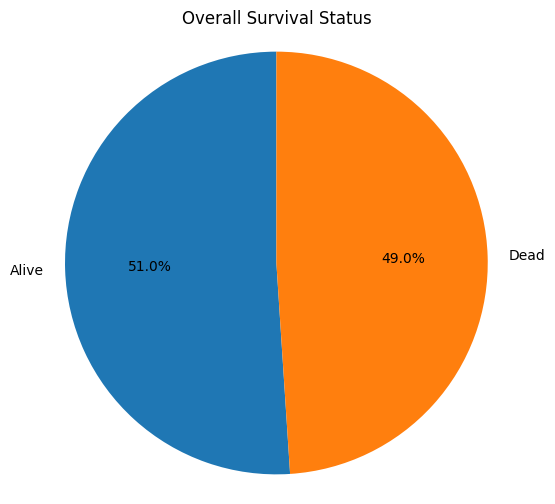

In [16]:
labels = ['Alive', 'Dead']
counts = [222, 213]
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Overall Survival Status')
plt.axis('equal')  
plt.show()

In [17]:
sex = df_clin['Sex'].iloc[4:].value_counts()
sex

Male      273
Female    169
Name: Sex, dtype: int64

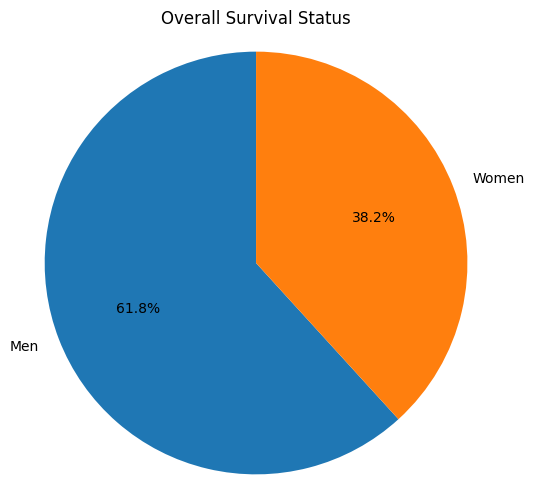

In [18]:
labels = ['Men', 'Women']
counts = [273, 169]
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Overall Survival Status')
plt.axis('equal')  
plt.show()

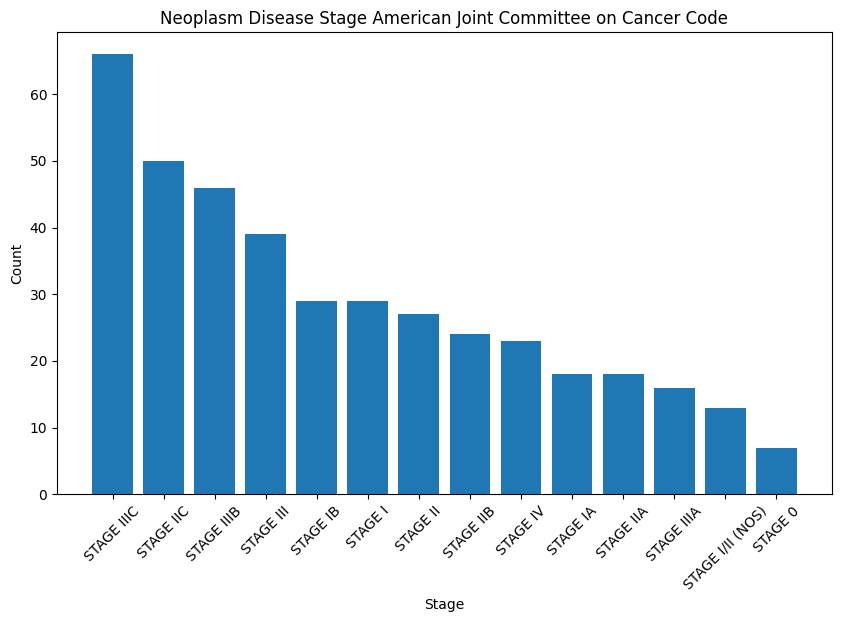

In [19]:
stage_counts = df_clin['Neoplasm Disease Stage American Joint Committee on Cancer Code'].iloc[4:].value_counts()
labels = stage_counts.index.tolist()
counts = stage_counts.values
plt.figure(figsize=(10,6))
plt.bar(labels, counts)
plt.title('Neoplasm Disease Stage American Joint Committee on Cancer Code')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

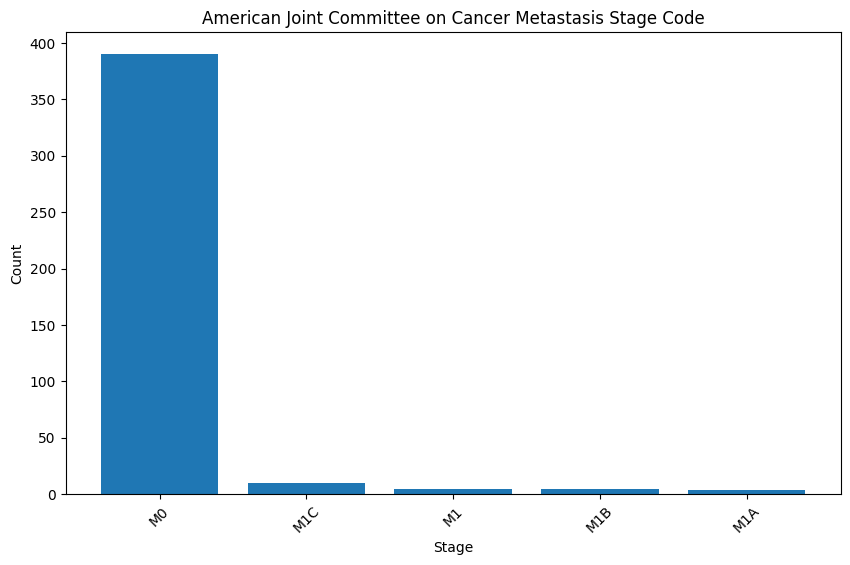

In [20]:
stage_counts = df_clin['American Joint Committee on Cancer Metastasis Stage Code'].iloc[4:].value_counts()
labels = stage_counts.index.tolist()
counts = stage_counts.values
plt.figure(figsize=(10,6))
plt.bar(labels, counts)
plt.title('American Joint Committee on Cancer Metastasis Stage Code')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

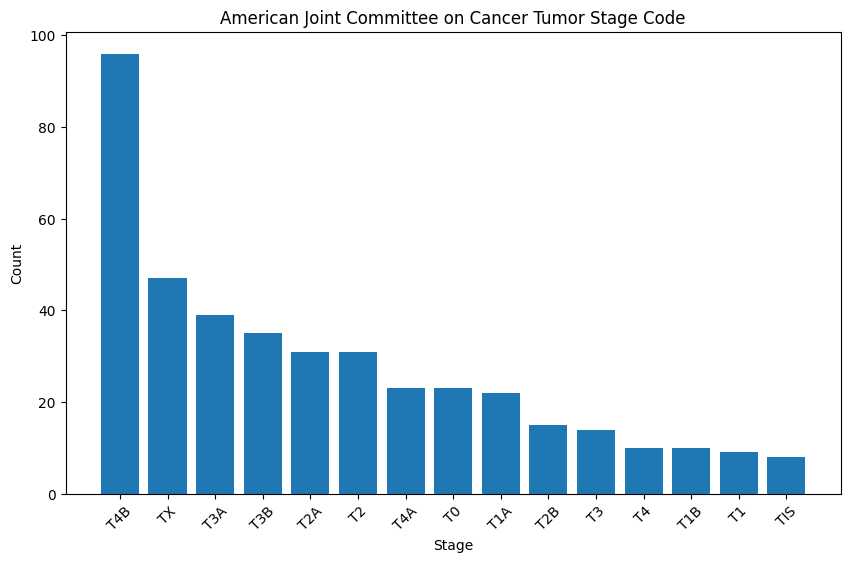

In [21]:
stage_counts = df_clin['American Joint Committee on Cancer Tumor Stage Code'].iloc[4:].value_counts()
labels = stage_counts.index.tolist()
counts = stage_counts.values
plt.figure(figsize=(10,6))
plt.bar(labels, counts)
plt.title('American Joint Committee on Cancer Tumor Stage Code')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

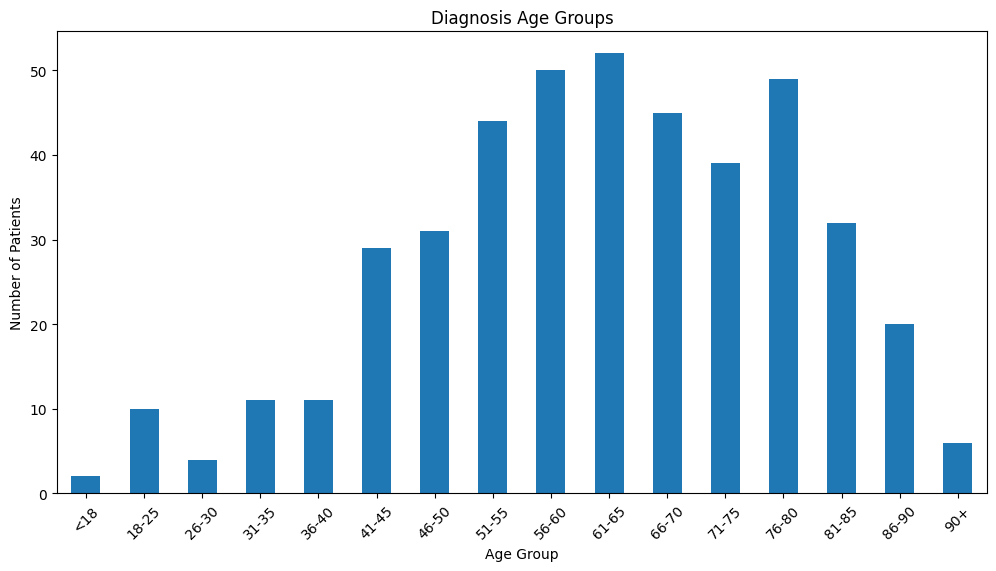

In [22]:
ages = pd.to_numeric(df_clin['Diagnosis Age'], errors='coerce').dropna()
bins = [0, 18, 25] + list(range(26, 91, 5)) + [np.inf]
labels = ['<18', '18-25'] + [f"{i}-{i+4}" for i in range(26, 90, 5)] + ['90+']
age_groups = pd.cut(ages, bins=bins, labels=labels, right=False)
age_counts = age_groups.value_counts().sort_index()

plt.figure(figsize=(12,6))
age_counts.plot(kind='bar')
plt.title('Diagnosis Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

In [23]:
targetCol1 = 'American Joint Committee on Cancer Tumor Stage Code'
targetCol2 = 'American Joint Committee on Cancer Metastasis Stage Code'
targetCol3 = 'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code'
targetCol4 = 'Progress Free Survival (Months)'

In [24]:
aux = []
for sample in df_expr.index.values:
    sample = sample.split('-')
    sample = '-'.join(sample[0:3])
    aux.append(sample)

In [25]:
df_expr.index = aux

In [26]:
merged_df = pd.merge(df_clin, df_expr, left_index=True, right_index=True)

In [27]:
merged_df.head()
merged_df.columns[:40]

Index([                                                                                    'Subtype',
                                                              'TCGA PanCanAtlas Cancer Type Acronym',
                                                                                  'Other Patient ID',
                                                                                     'Diagnosis Age',
                                                                                               'Sex',
                                    'Neoplasm Disease Stage American Joint Committee on Cancer Code',
                                       'American Joint Committee on Cancer Publication Version Type',
                                 'Last Communication Contact from Initial Pathologic Diagnosis Date',
                                                      'Birth from Initial Pathologic Diagnosis Date',
                            'Last Alive Less Initial Pathologic Diagnosis Date Cal

In [28]:
merged_df['Overall Survival Status'].unique()

array(['1:DECEASED', '0:LIVING', nan], dtype=object)

In [30]:
merged_df.isna().sum()

Subtype                                 78
TCGA PanCanAtlas Cancer Type Acronym     0
Other Patient ID                         0
Diagnosis Age                            8
Sex                                      0
                                        ..
ZYG11A                                   0
ZYG11B                                   0
ZYX                                      0
ZZEF1                                    0
ZZZ3                                     0
Length: 20568, dtype: int64

In [ ]:
#!pip install pycaret --user

In [37]:
agresivosT1 = ['T3', 'T3A', 'T3B', 'T4', 'T4A', 'T4B']
agresivosT3 = ['N1A', 'N1B', 'N2A', 'N2B', 'N2C', 'N3']
auxT1 = []
for value in merged_df[targetCol1]:
    if value in agresivosT1:
        auxT1.append(True)
    else:   
        auxT1.append(False)
auxT3 = []
for value in merged_df[targetCol1]:
    if value in agresivosT3:
        auxT3.append(True)
    else:   
        auxT3.append(False)
auxAgresivos = []
for i in range(len(auxT1)):
    if auxT1[i] or auxT3[i]:
        auxAgresivos.append(True)
    else:   
        auxAgresivos.append(False)
merged_df['trueTarget'] = auxAgresivos

In [38]:
cols = merged_df.columns
duplicated_cols = cols[cols.duplicated()]
print("Duplicadas:", duplicated_cols.tolist())
empty_name_cols = [c for c in cols if pd.isna(c) or c == '']
print("Vacías o NaN:", empty_name_cols)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
merged_df = merged_df.loc[:, ~merged_df.columns.isin(empty_name_cols)]
merged_df = merged_df.reset_index(drop=True)
merged_df = merged_df.dropna(subset=['Overall Survival Status'])
print(merged_df['Overall Survival Status'].value_counts())

Duplicadas: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'FGF13', 'ELMOD1', 'NKAIN3', 'PALM2AKAP2', 'QSOX1', 'SNAP47', 'TMEM8B']
Vacías o NaN: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
0:LIVING      222
1:DECEASED    214
Name: Overall Survival Status, dtype: int64


In [41]:
df_survival = merged_df.iloc[:, indiceGenStart:]
df_survival ['Overall Survival Status'] = merged_df['Overall Survival Status']
df_survival = df_survival.dropna(subset=['Overall Survival Status']).reset_index(drop=True)
df_survival.head()
df_survival.to_csv('df_survival.csv', index=False)

In [43]:
merged_df.head()

,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,trueTarget
0,SKCM,SKCM,5564E6A7-2195-4B0D-994E-B0617B58E889,71,Male,STAGE IA,7TH,NaN,-26176,0,...,1.5289,-1.4791,-1.0775,-0.5874,0.7428,-0.2728,-2.0876,-2.2139,-0.1152,False
1,SKCM,SKCM,551E071A-C290-4B48-9000-F64C2A44DFB7,82,Male,STAGE IIA,6TH,2022,-30286,0,...,-0.5350,0.5245,0.2616,0.3533,-0.7334,-0.1408,-0.3072,-1.2198,0.6850,False
2,SKCM,SKCM,A29A20E3-5C2C-4F37-B93E-AE9EBC46EC53,82,Male,STAGE IIIA,7TH,NaN,-30163,0,...,-0.5780,-0.6422,-0.2198,0.6876,1.4183,0.2610,-0.4649,-0.5828,-0.0017,False
3,NaN,SKCM,3DD5A206-D7F3-42F1-B9CC-4B31C76D495D,46,Female,STAGE IIC,7TH,387,-17025,0,...,-0.0718,-0.1132,-0.1148,0.3637,-1.3046,-1.0278,0.2870,0.7965,-1.7373,True
4,NaN,SKCM,EFF78AF6-0F68-49B9-866B-0D511606F2B1,74,Female,STAGE IIC,7TH,14,-27124,0,...,0.4944,0.6672,0.3759,-0.7236,-1.3046,0.5597,0.2858,-0.6041,1.3473,True


In [49]:
merged_df.to_csv('df_truetarget.csv', index=False)

In [50]:
df_1 = pd.read_csv('df_truetarget.csv')

C:\Users\admin\AppData\Local\Temp\ipykernel_15876\3099034894.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('df_truetarget.csv')


In [51]:
df_1.head()

,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,trueTarget
0,SKCM,SKCM,5564E6A7-2195-4B0D-994E-B0617B58E889,71.0,Male,STAGE IA,7TH,NaN,-26176,0.0,...,1.5289,-1.4791,-1.0775,-0.5874,0.7428,-0.2728,-2.0876,-2.2139,-0.1152,False
1,SKCM,SKCM,551E071A-C290-4B48-9000-F64C2A44DFB7,82.0,Male,STAGE IIA,6TH,2022.0,-30286,0.0,...,-0.5350,0.5245,0.2616,0.3533,-0.7334,-0.1408,-0.3072,-1.2198,0.6850,False
2,SKCM,SKCM,A29A20E3-5C2C-4F37-B93E-AE9EBC46EC53,82.0,Male,STAGE IIIA,7TH,NaN,-30163,0.0,...,-0.5780,-0.6422,-0.2198,0.6876,1.4183,0.2610,-0.4649,-0.5828,-0.0017,False
3,NaN,SKCM,3DD5A206-D7F3-42F1-B9CC-4B31C76D495D,46.0,Female,STAGE IIC,7TH,387.0,-17025,0.0,...,-0.0718,-0.1132,-0.1148,0.3637,-1.3046,-1.0278,0.2870,0.7965,-1.7373,True
4,NaN,SKCM,EFF78AF6-0F68-49B9-866B-0D511606F2B1,74.0,Female,STAGE IIC,7TH,14.0,-27124,0.0,...,0.4944,0.6672,0.3759,-0.7236,-1.3046,0.5597,0.2858,-0.6041,1.3473,True
